## 5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

Enam Langkah Testing:
1. Tentukan Hipotesis nol ($H_0$: θ = $θ_0$), dimana θ bisa berupa μ, $σ^{2}$, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > $θ_0$, θ < $θ_0$, atau θ ≠ $θ_0$.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.


In [1]:
#IMPORT MODULE & LOAD CSV
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
df = pd.read_csv('water_potability.csv', header=None)
df.columns = ["iD", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df

,iD,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


### a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?


1. Tentukan Hipotesis nol $H_0$ : $\mu_1$ - $\mu_2$ = 0
2. Pilih Hipotesis Alternatif $H_{1}$ : $\mu_1$ - $\mu_2$ $\neq$ 0
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji rata-rata dua populasi $\mu_1$ - $\mu_2$ = $d_0$ dengan standar deviasi diketahui (dapat dicari), 
z = $\frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $ dengan $d_0$ = 0 \
Daerah Kritis : \
$z < -z_\frac{\alpha}{2}$ atau $z > z_\frac{\alpha}{2}$ dengan $z_\frac{\alpha}{2}$ = 1.96 karena P(Z < z) = 1 - ($\frac{0.05}{2}$) = 0.975 \
$z < -1.96$ atau $z > 1.96$
5. Hitung nilai uji statistik dari data sample.

z =  -2.0735632660592493
pval =  0.03811988973939884


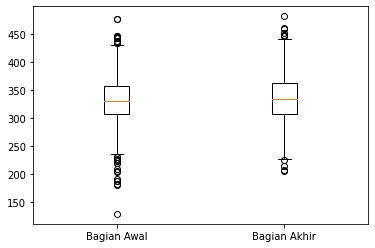

In [2]:
# z value
xbar1 = df.loc[:1004].Sulfate.mean()
xbar2 = df.loc[1005:].Sulfate.mean()
std = df.Sulfate.std()
n = 1005
print("z = ", (xbar1 - xbar2)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))
print("pval = ",(1 - stats.norm.cdf(abs((xbar1 - xbar2)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))))*2)

# box plot
plt.boxplot([df.loc[:1004].Sulfate, df.loc[1005:].Sulfate])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

6. Ambil keputusan : Tolak nilai $H_0$ karena nilai Z berada pada daerah kritis dan terima $H_1$, maka dapat diambil kesimpulan bahwa rata-rata kedua bagian tidaklah sama dan diperkuat dengan tes signifikansi dimana nilai p-value lebih kecil dari tingkat signifikan yang dipilih.

### b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

1. Tentukan Hipotesis nol $H_0$ : $\mu_1$ - $\mu_2$ = 0.15
2. Pilih Hipotesis Alternatif $H_{1}$ : $\mu_1$ - $\mu_2$ $\neq$ 0.15
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji rata-rata dua populasi $\mu_1$ - $\mu_2$ = $d_0$ dengan standar deviasi diketahui (dapat dicari), 
z = $\frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $ dengan $d_0$ = 0.15 \
Daerah Kritis : \
$z < -z_\frac{\alpha}{2}$ atau $z > z_\frac{\alpha}{2}$ dengan $z_\frac{\alpha}{2}$ = 1.96 karena P(Z < z) = 1 - ($\frac{0.05}{2}$) = 0.975 \
$z < -1.96$ atau $z > 1.96$
5. Hitung nilai uji statistik dari data sample.

z =  -2.412566026857564
pval =  0.015840668015256965


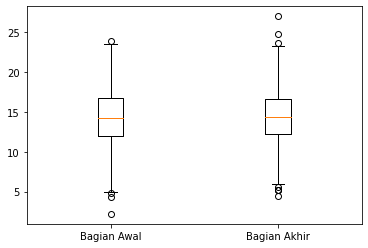

In [3]:
# z value
xbar1 = df.loc[:1004].OrganicCarbon.mean()
xbar2 = df.loc[1005:].OrganicCarbon.mean()
std = df.OrganicCarbon.std()
n = 1005
print("z = ",(xbar1 - xbar2 - 0.15)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))
print("pval = ",(1 - stats.norm.cdf(abs((xbar1 - xbar2 - 0.15)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))))*2)

# box plot
plt.boxplot([df.loc[:1004].OrganicCarbon, df.loc[1005:].OrganicCarbon])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

6. Ambil keputusan : Tolak nilai $H_0$ karena nilai Z berada pada daerah kritis dan terima $H_1$, maka dapat diambil kesimpulan bahwa rata-rata bagian awal kolom OrganicCarbon tidak lebih besar dari pada bagian akhirnya sebesar 0.15 dan diperkuat dengan tes signifikansi dimana nilai p-value lebih kecil dari tingkat signifikan yang dipilih.

### c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

1. Tentukan Hipotesis nol $H_0$ : $\mu_1$ - $\mu_2$ = 0
2. Pilih Hipotesis Alternatif $H_{1}$ : $\mu_1$ - $\mu_2$ $\neq$ 0
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji rata-rata dua populasi $\mu_1$ - $\mu_2$ = $d_0$ dengan standar deviasi diketahui (dapat dicari), 
z = $\frac{(\bar{x_1} - \bar{x_2}) - d_0}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}} $ dengan $d_0$ = 0 \
Daerah Kritis : \
$z < -z_\frac{\alpha}{2}$ atau $z > z_\frac{\alpha}{2}$ dengan $z_\frac{\alpha}{2}$ = 1.96 karena P(Z < z) = 1 - ($\frac{0.05}{2}$) = 0.975 \
$z < -1.96$ atau $z > 1.96$
5. Hitung nilai uji statistik dari data sample.

z =  -0.6219312633138907
pval =  0.5339870668355124


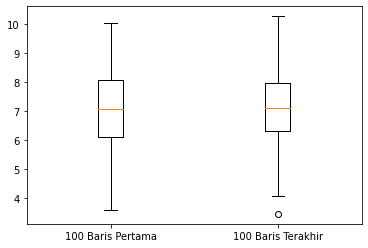

In [4]:
# z value
xbar1 = df.loc[:99].Chloramines.mean()
xbar2 = df.loc[1910:].Chloramines.mean()
std = df.Chloramines.std()
n = 100
print("z = ",(xbar1 - xbar2)/(np.sqrt((std**2/n)+(std**2/n))))
print("pval = ",(1 - stats.norm.cdf(abs((xbar1 - xbar2)/(np.sqrt((pow(std,2)/n)+(pow(std,2)/n))))))*2)

# box plot
plt.boxplot([df.loc[:99].Chloramines, df.loc[1910:].Chloramines])
plt.xticks([1, 2], ["100 Baris Pertama", "100 Baris Terakhir"])
plt.show()

6. Ambil keputusan : Terima nilai $H_0$ karena nilai Z berada di luar daerah kritis dan tolak $H_1$, maka dapat diambil kesimpulan bahwa rata-rata 100 baris pertama dan 100 baris terakhir kolom Chloramines sama dan diperkuat dengan tes signifikansi dimana nilai p-value lebih besar dari tingkat signifikan yang dipilih.

### d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?

1. Tentukan Hipotesis nol $H_0$ : $p_1$ - $p_2$ = 0
2. Pilih Hipotesis Alternatif $H_{1}$ : $p_1$ - $p_2$ > 0
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai : \
Digunakan uji proporsi dengan distribusi normal, 
z = $ \frac{(\hat{p_1} - \hat{p_2})}{\sqrt{\bar{p}\bar{q}(1/n_1 + 1/n_2)}} $ \
Daerah Kritis : \
$z > z_{\alpha}$ dengan $z_{\alpha}$ = 1.645 karena P(Z < z) = 1 - 0.05 = 0.95 \
$z > 1.645$
5. Hitung nilai uji statistik dari data sample.

z =  -3.0465394878578107


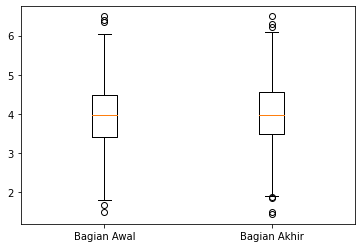

In [5]:
# z value
n1 = n2 = 1005
pHat1 = len(df.head(1005)[df.head(1005)["Turbidity"] > 4]) / 1005
pHat2 = len(df.tail(1005)[df.tail(1005)["Turbidity"] > 4]) / 1005
pBar = (pHat1 + pHat2) / 2010
# qbar = 1-pBar
print("z = ",(pHat1 - pHat2)/(np.sqrt(pBar*(1-pBar)*((1/n1)+(1/n2)))))

# box plot
plt.boxplot([df.loc[:1004].Turbidity, df.loc[1005:].Turbidity])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

6. Ambil keputusan : Terima nilai $H_0$ karena nilai Z berada di luar daerah kritis dan tolak $H_1$, maka dapat diambil kesimpulan bahwa proporsi nilai bagian awal Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di bagian akhir

### e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

1. Tentukan Nilai Hipotesis nol $H_0$ : $\sigma_1^2$ = $\sigma_2^2$
2. Pilih Hipotesis Alternatif $H_1$ : $\sigma_1^2$ $\neq$ $\sigma_2^2$
3. Tentukan Tingkat Signifikan, karena tidak spesifik diberikan maka menggunakan $\alpha$ = 0.05
4. Tentukan Uji Statistik yang sesuai \
Digunakan uji variansi dua populasi dengan distribusi f , f = $\dfrac{s_1^2}{s_2^2} $ \
Daerah kritis : \
$f < f_\frac{1 - \alpha}{2} (v_1, v_2)$ atau $f > f_\frac{\alpha}{2}(v_1, v_2)$ dengan $v_1 = n_1 -1$, $v_2 = n_2 -1$

Daerah kritis : f < 0.883572344355818 atau f > 1.1317692392568777


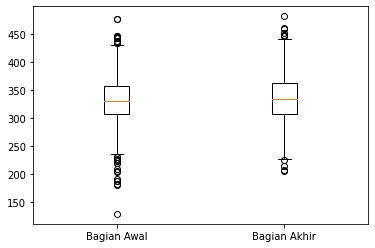

In [6]:
# z value
n = (len(df.Sulfate)/2) - 1
f1 = stats.f.ppf(0.025, n, n)
f2 = stats.f.ppf(0.975, n, n)
print("Daerah kritis : f <", f1, "atau f >", f2)

# box plot
plt.boxplot([df.loc[:1004].Sulfate, df.loc[1005:].Sulfate])
plt.xticks([1, 2], ["Bagian Awal", "Bagian Akhir"])
plt.show()

5. Hitung nilai uji statistik dari data sample.

In [7]:
var1 = df.Sulfate.loc[:1004].var()
var2 = df.Sulfate.loc[1005:].var()
print("f = ", var1/var2)

f =  1.0152511043950063


6. Ambil keputusan : Terima nilai $H_0$ karena nilai f berada di luar daerah kritis dan tolak $H_1$, maka dapat diambil kesimpulan bahwa variansi bagian awal dan bagian akhir kolom Sulfate sama

## 6. Test korelasi: tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Korelasi ditentukan dengan menggunakan pearson's correlation test dengan hipotesis
- Hipotesis Nol $H_0$: p=0 (Kedua kolom tidak berkorelasi)
- Hipotesis Alternatif $H_1$ : p≠0 (Kedua Kolom berkorelasi)

In [8]:
def corTest(col1, col2):
    sns.scatterplot(data=df, x=col1, y=col2)
    cor, pval = stats.pearsonr(df[col1], df[col2])
    if pval > 0.05 : # digunakan alpha = 0.05
        print("H₀ diterima (kedua kolom tidak berkorelasi)")
    else:
        print("H₀ ditolak (kedua kolom  berkorelasi)")
    print("Koefisien Korelasi = ", cor)
    print("pval = ", pval)

### Tes Korelasi Kolom non-Target pH dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.015475094408433502
pval =  0.48805529843977147


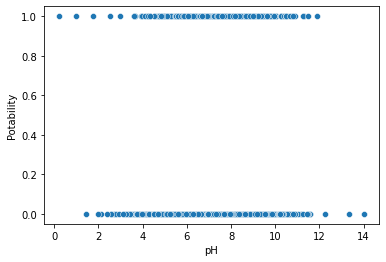

In [9]:
corTest("pH", "Potability")

### Tes Korelasi Kolom non-Target Hardness dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.0014631528959479423
pval =  0.9477306859719101


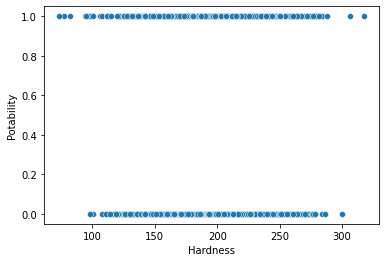

In [10]:
corTest("Hardness", "Potability")

### Tes Korelasi Kolom non-Target Solids dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.03897657818173474
pval =  0.08063479734364612


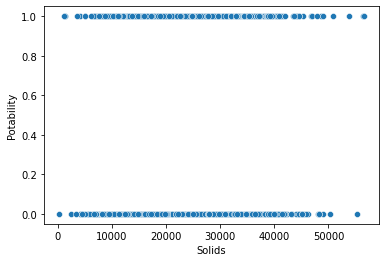

In [11]:
corTest("Solids", "Potability")

### Tes Korelasi Kolom non-Target Chloramines dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.02077892184052413
pval =  0.3518003359635207


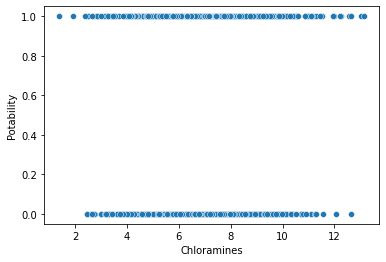

In [12]:
corTest("Chloramines", "Potability")

### Tes Korelasi Kolom non-Target Sulfate dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.015703164419273812
pval =  0.48166585681668234


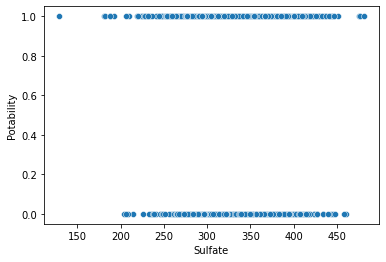

In [13]:
corTest("Sulfate", "Potability")

### Tes Korelasi Kolom non-Target Conductivity dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.016257120111377105
pval =  0.4663378059686175


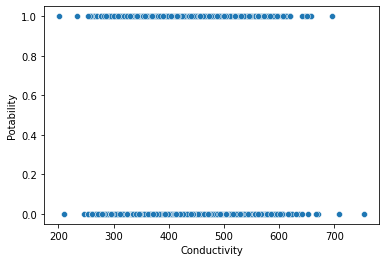

In [14]:
corTest("Conductivity", "Potability")

### Tes Korelasi Kolom non-Target OrganicCarbon dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  -0.015488461910747308
pval =  0.4876795482205311


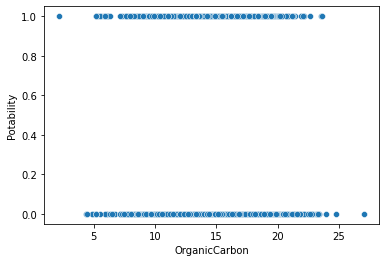

In [15]:
corTest("OrganicCarbon", "Potability")

### Tes Korelasi Kolom non-Target Trihalomethanes dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.009236711064713042
pval =  0.6789759745975009


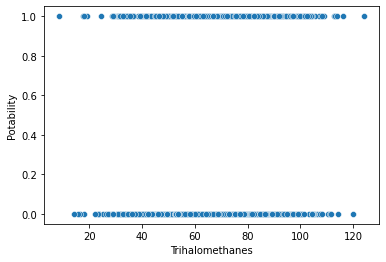

In [16]:
corTest("Trihalomethanes", "Potability")

### Tes Korelasi Kolom non-Target Turbidity dan Target Potability

H₀ diterima (kedua kolom tidak berkorelasi)
Koefisien Korelasi =  0.0223310426406227
pval =  0.316986307538362


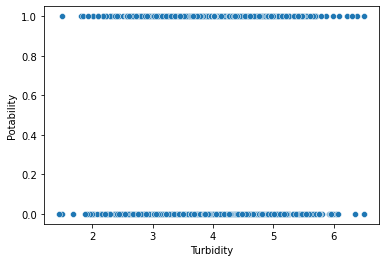

In [17]:
corTest("Turbidity", "Potability")